## NAME: OPARAH PEARL SOSOCHI

## PROGRAM: COMPUTER ENGINEERING

## MATRIC NO: 18CJ024152

# ANNUAL POPULATION GROWTH RATE IN PERCENTAGE CODE

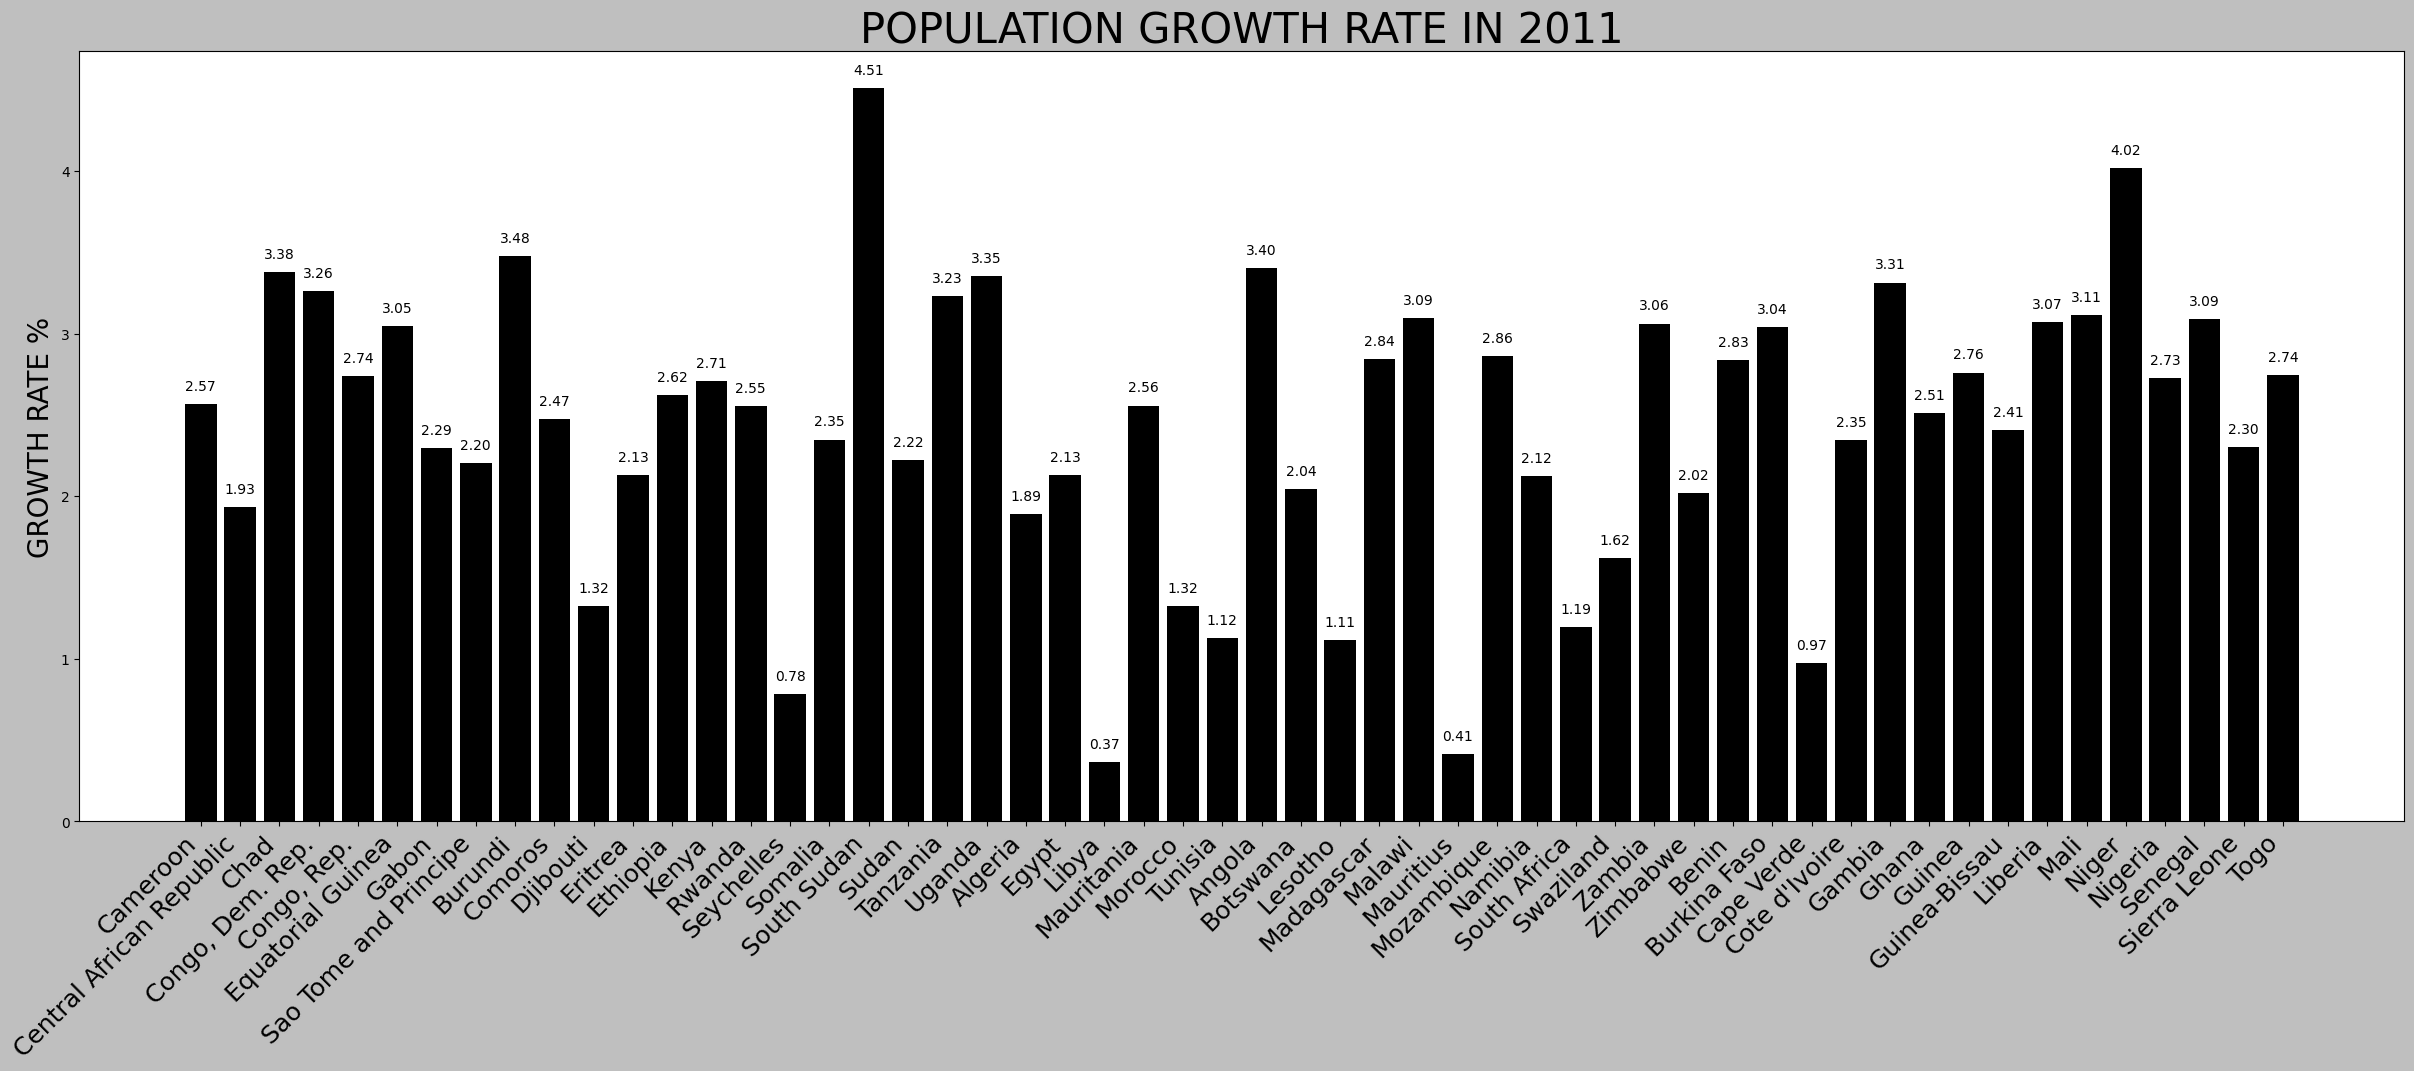

From the Bar Chart above:
The Standard Deviation is 0.8606169741079946
The Range is 4.144634280644098
The Interquartile Range is 0.994263750905831
The Variance is 0.7406615761228006


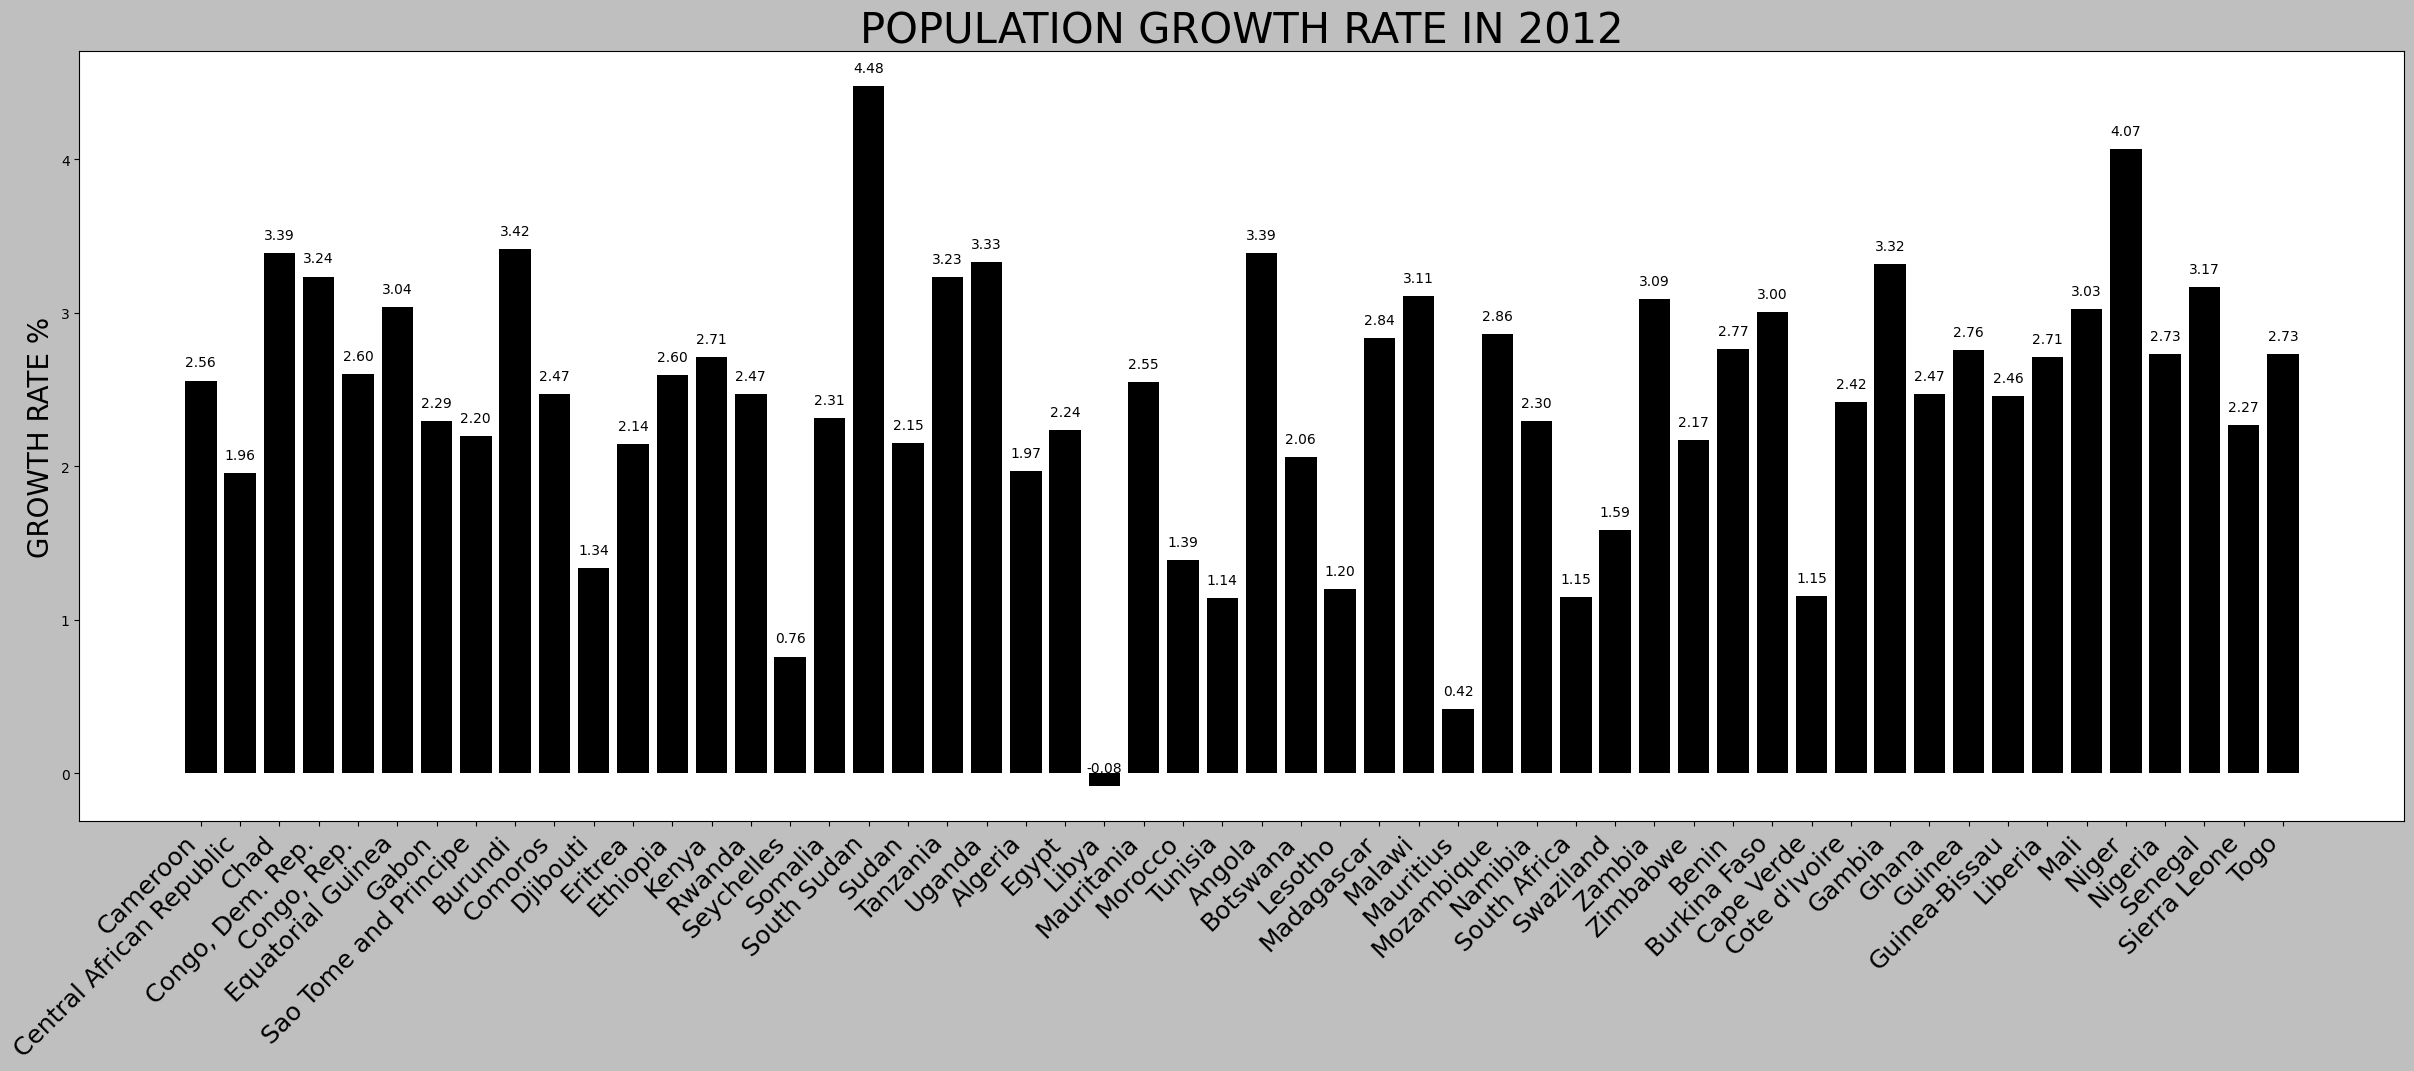

From the Bar Chart above:
The Standard Deviation is 0.8645959336653816
The Range is 4.5601142259787055
The Interquartile Range is 0.8751069058169816
The Variance is 0.7475261285107128


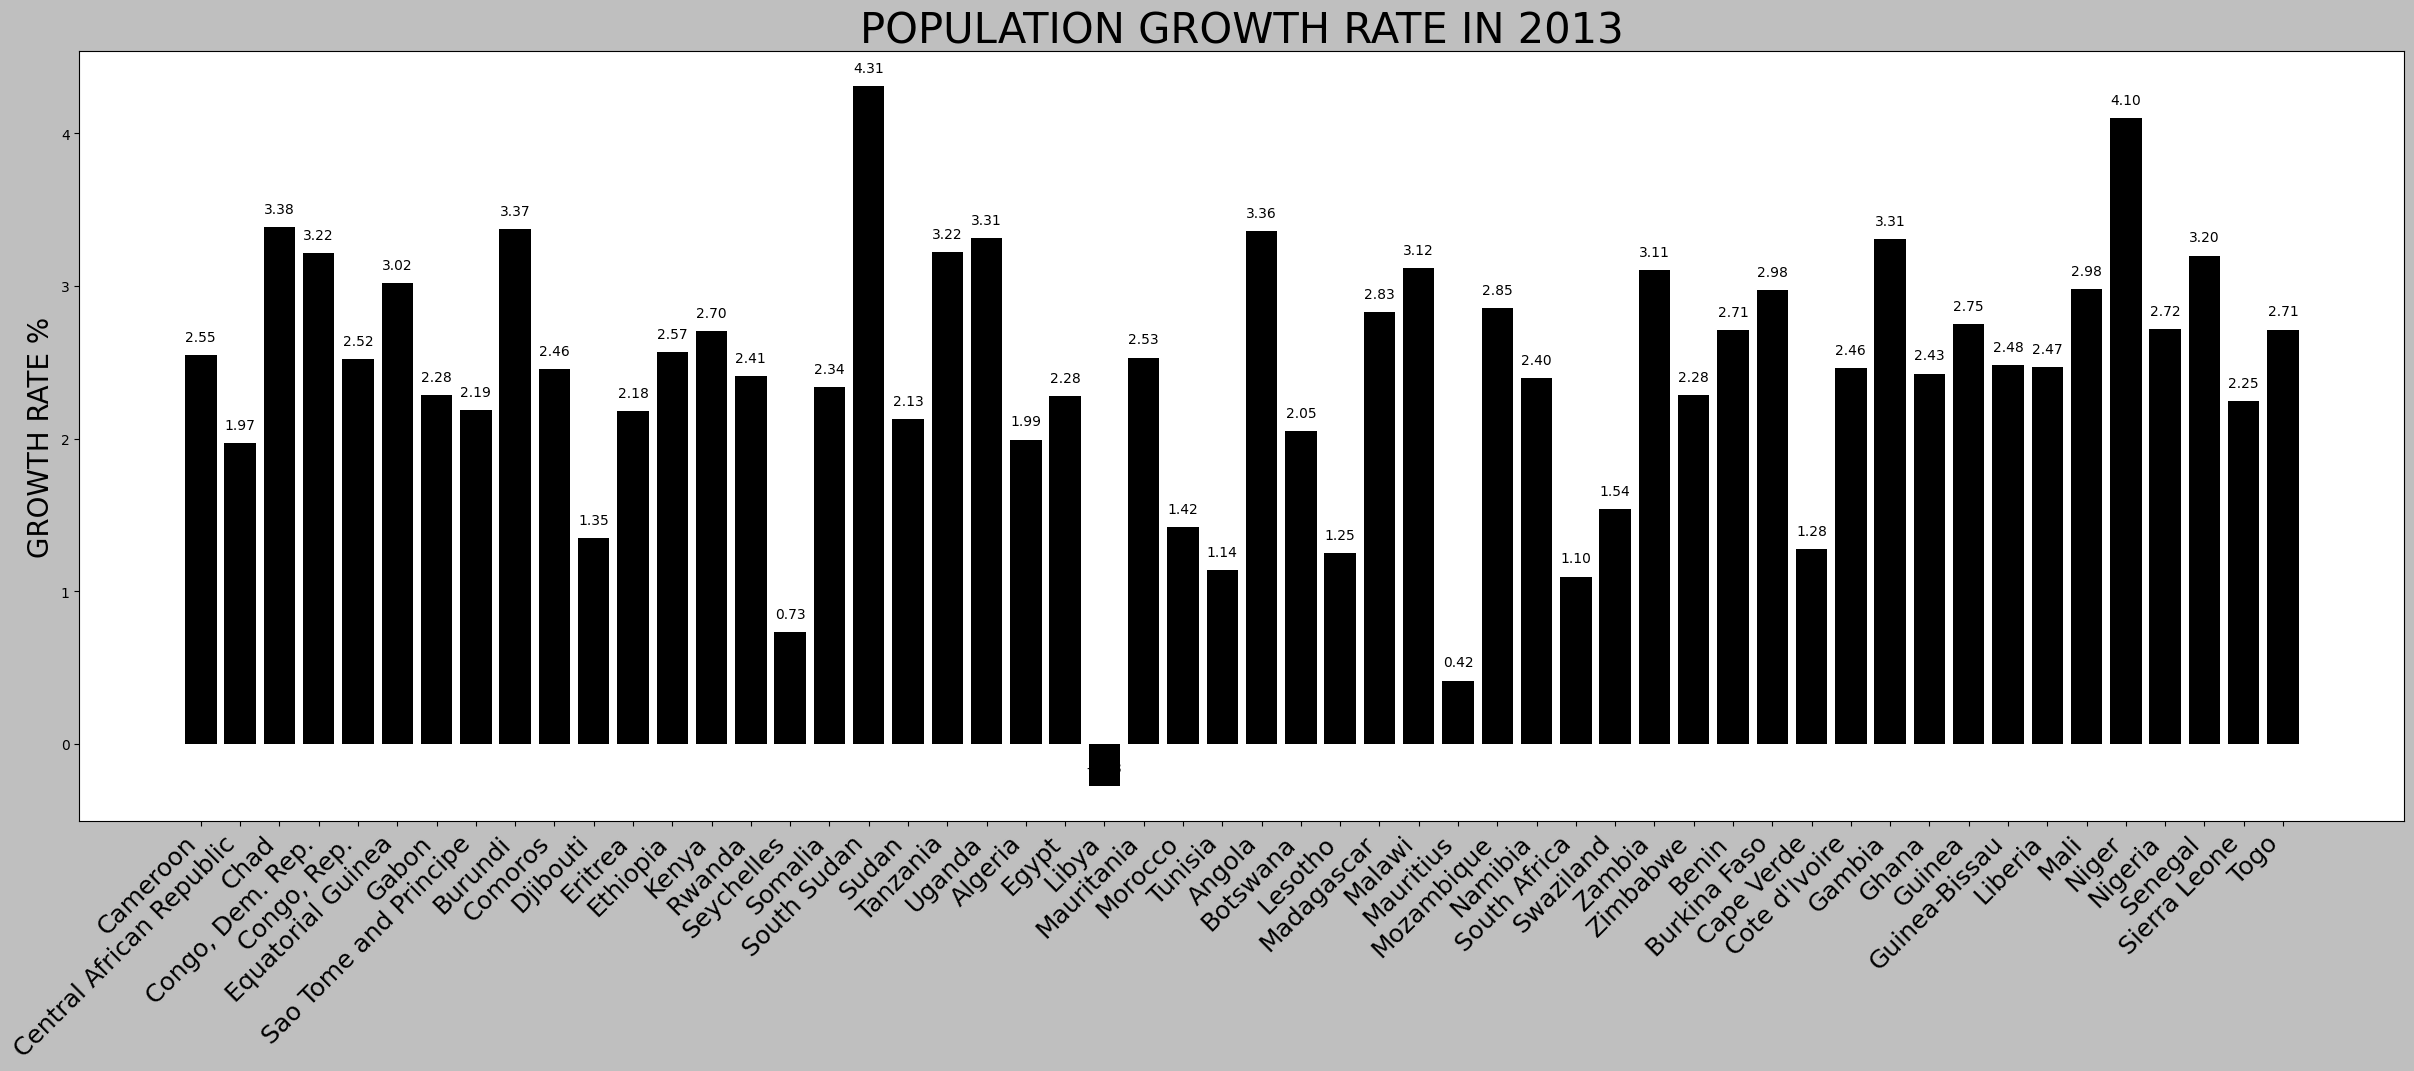

From the Bar Chart above:
The Standard Deviation is 0.8616897083992857
The Range is 4.58646565764431
The Interquartile Range is 0.8362096726903516
The Variance is 0.7425091535612459


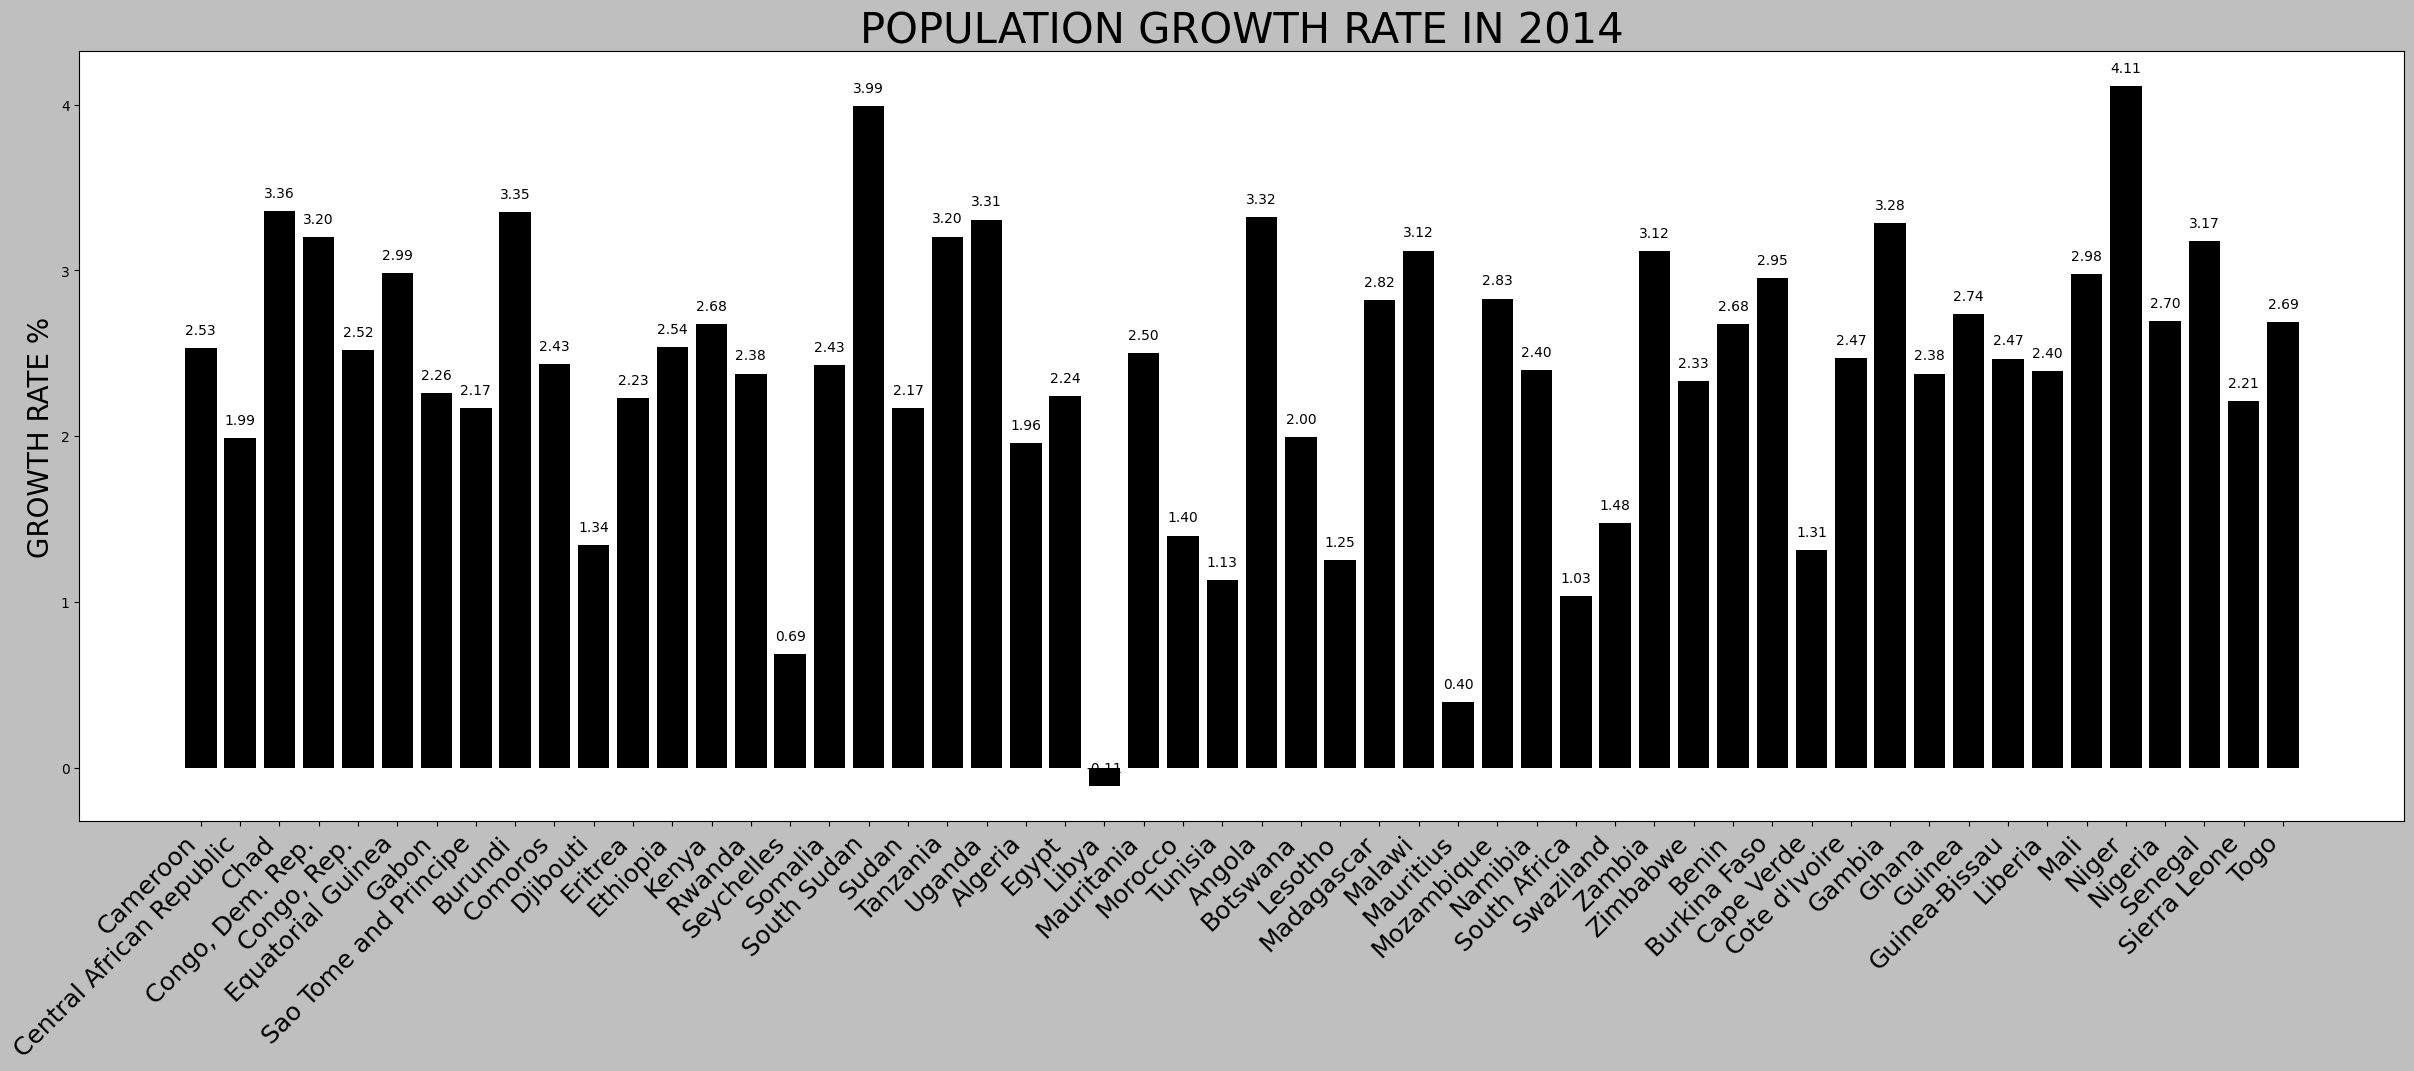

From the Bar Chart above:
The Standard Deviation is 0.8409898999592164
The Range is 4.223481894058604
The Interquartile Range is 0.802511474654501
The Variance is 0.7072640118334127


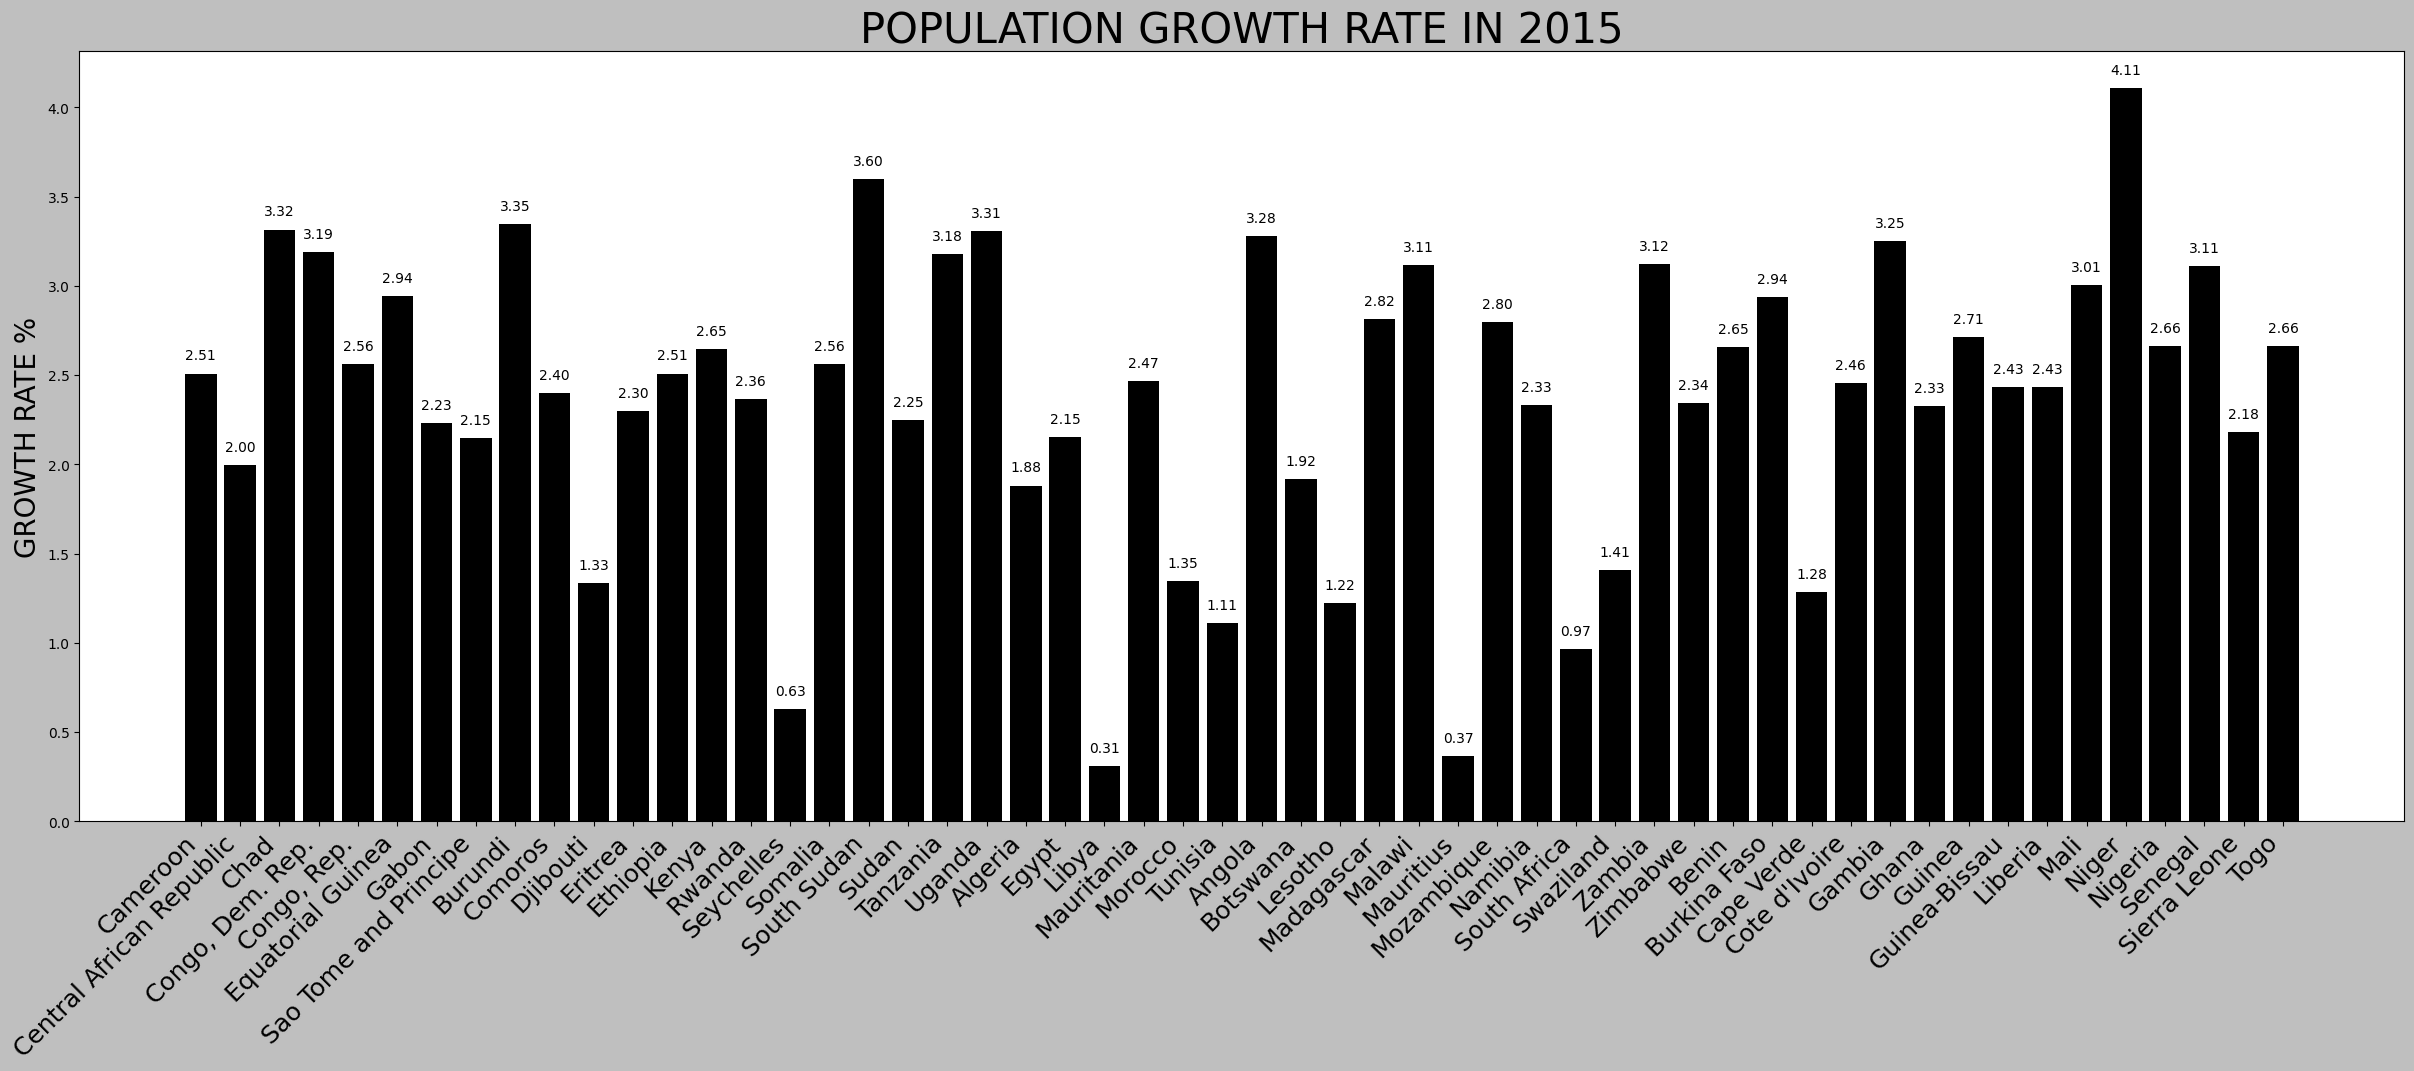

From the Bar Chart above:
The Standard Deviation is 0.8130350995856029
The Range is 3.7982294307153897
The Interquartile Range is 0.7937455933432105
The Variance is 0.6610260731581714


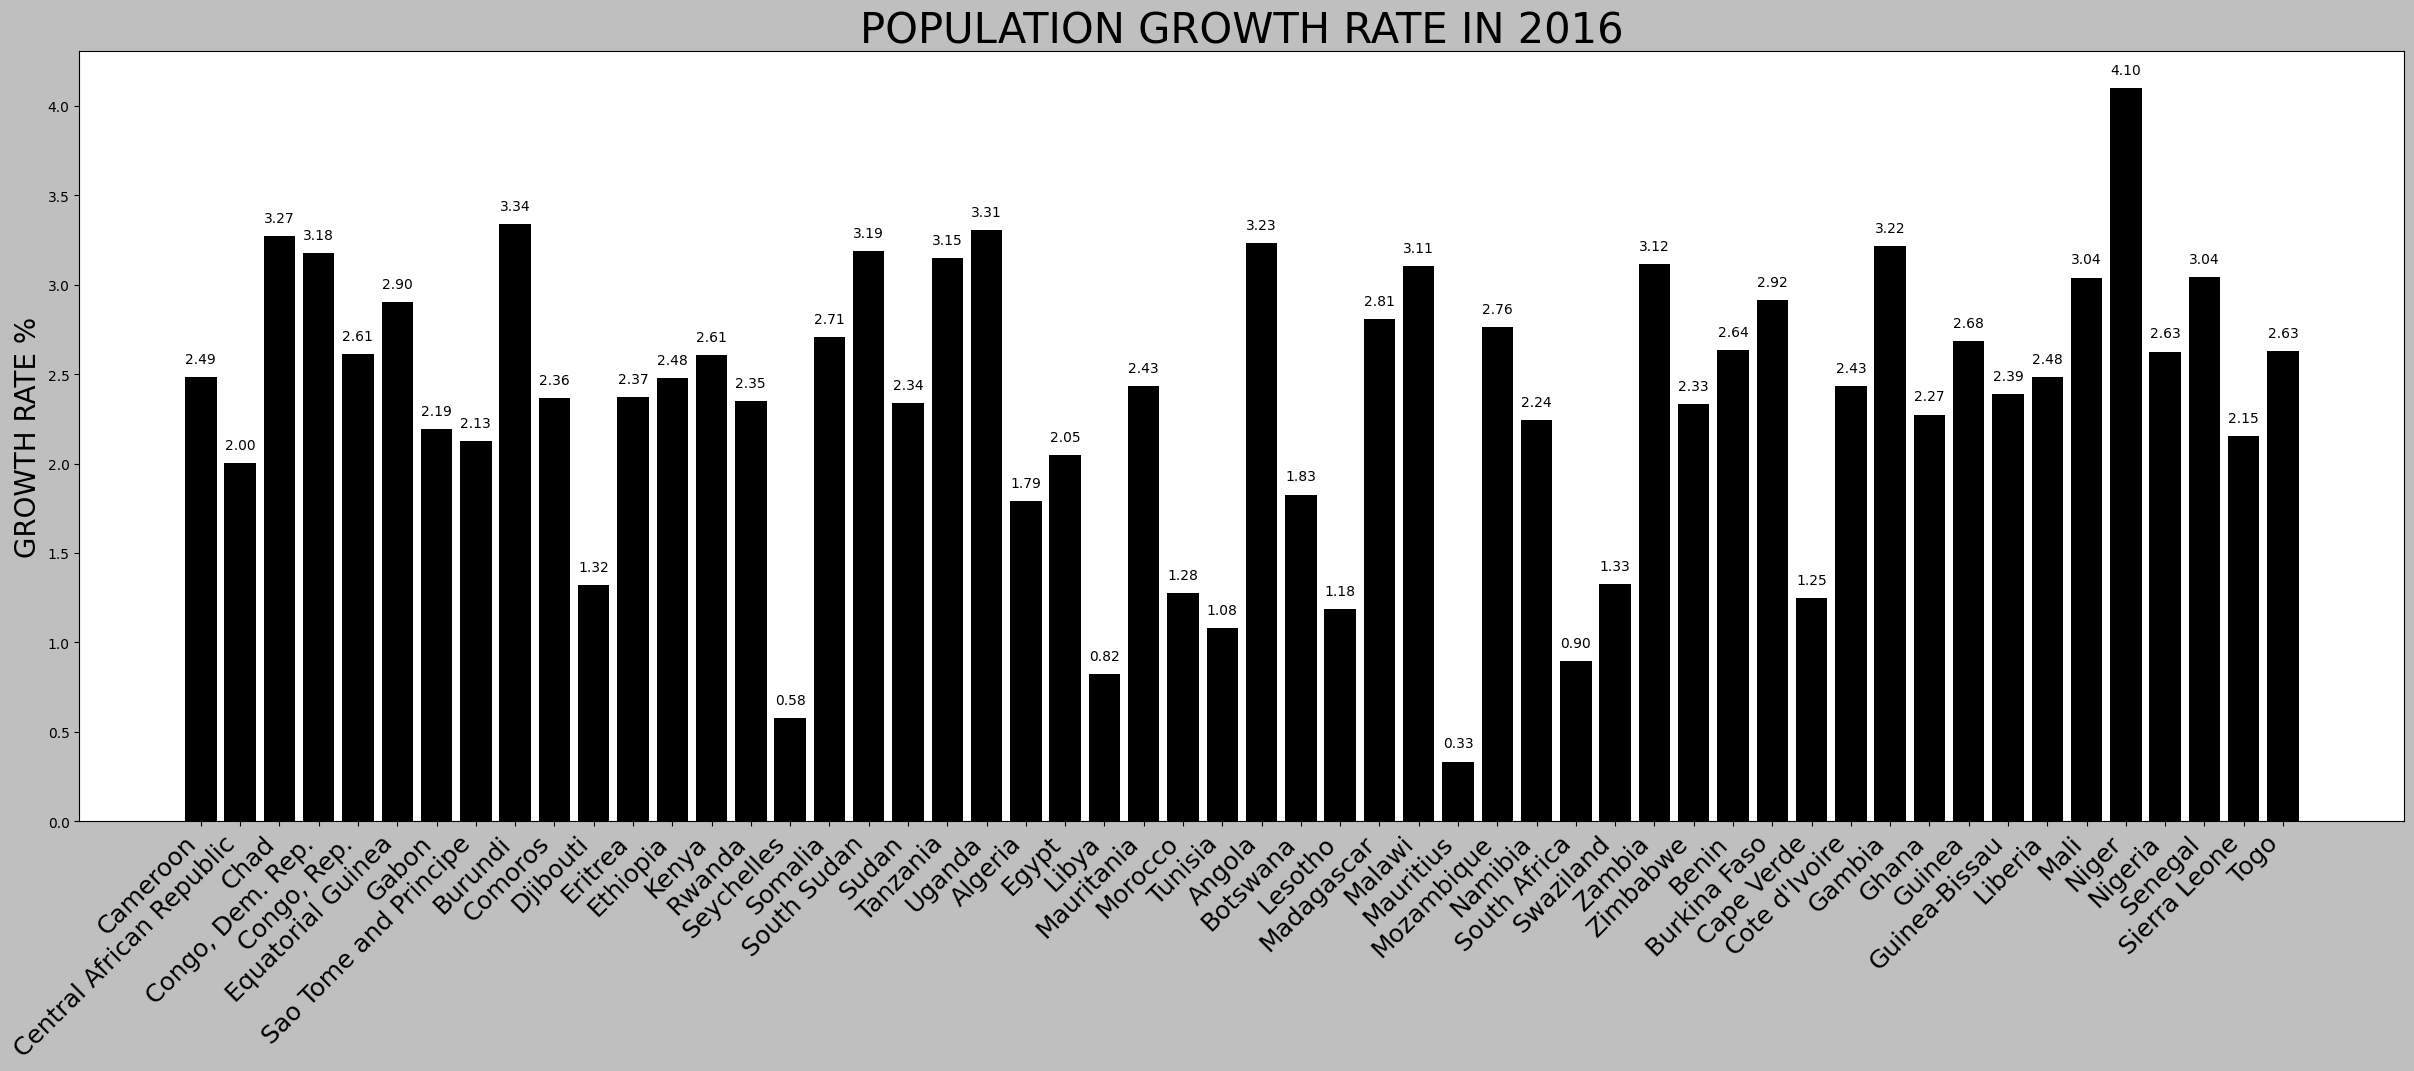

From the Bar Chart above:
The Standard Deviation is 0.7915187691894774
The Range is 3.7679472155129186
The Interquartile Range is 0.8448562938374606
The Variance is 0.6265019619792251


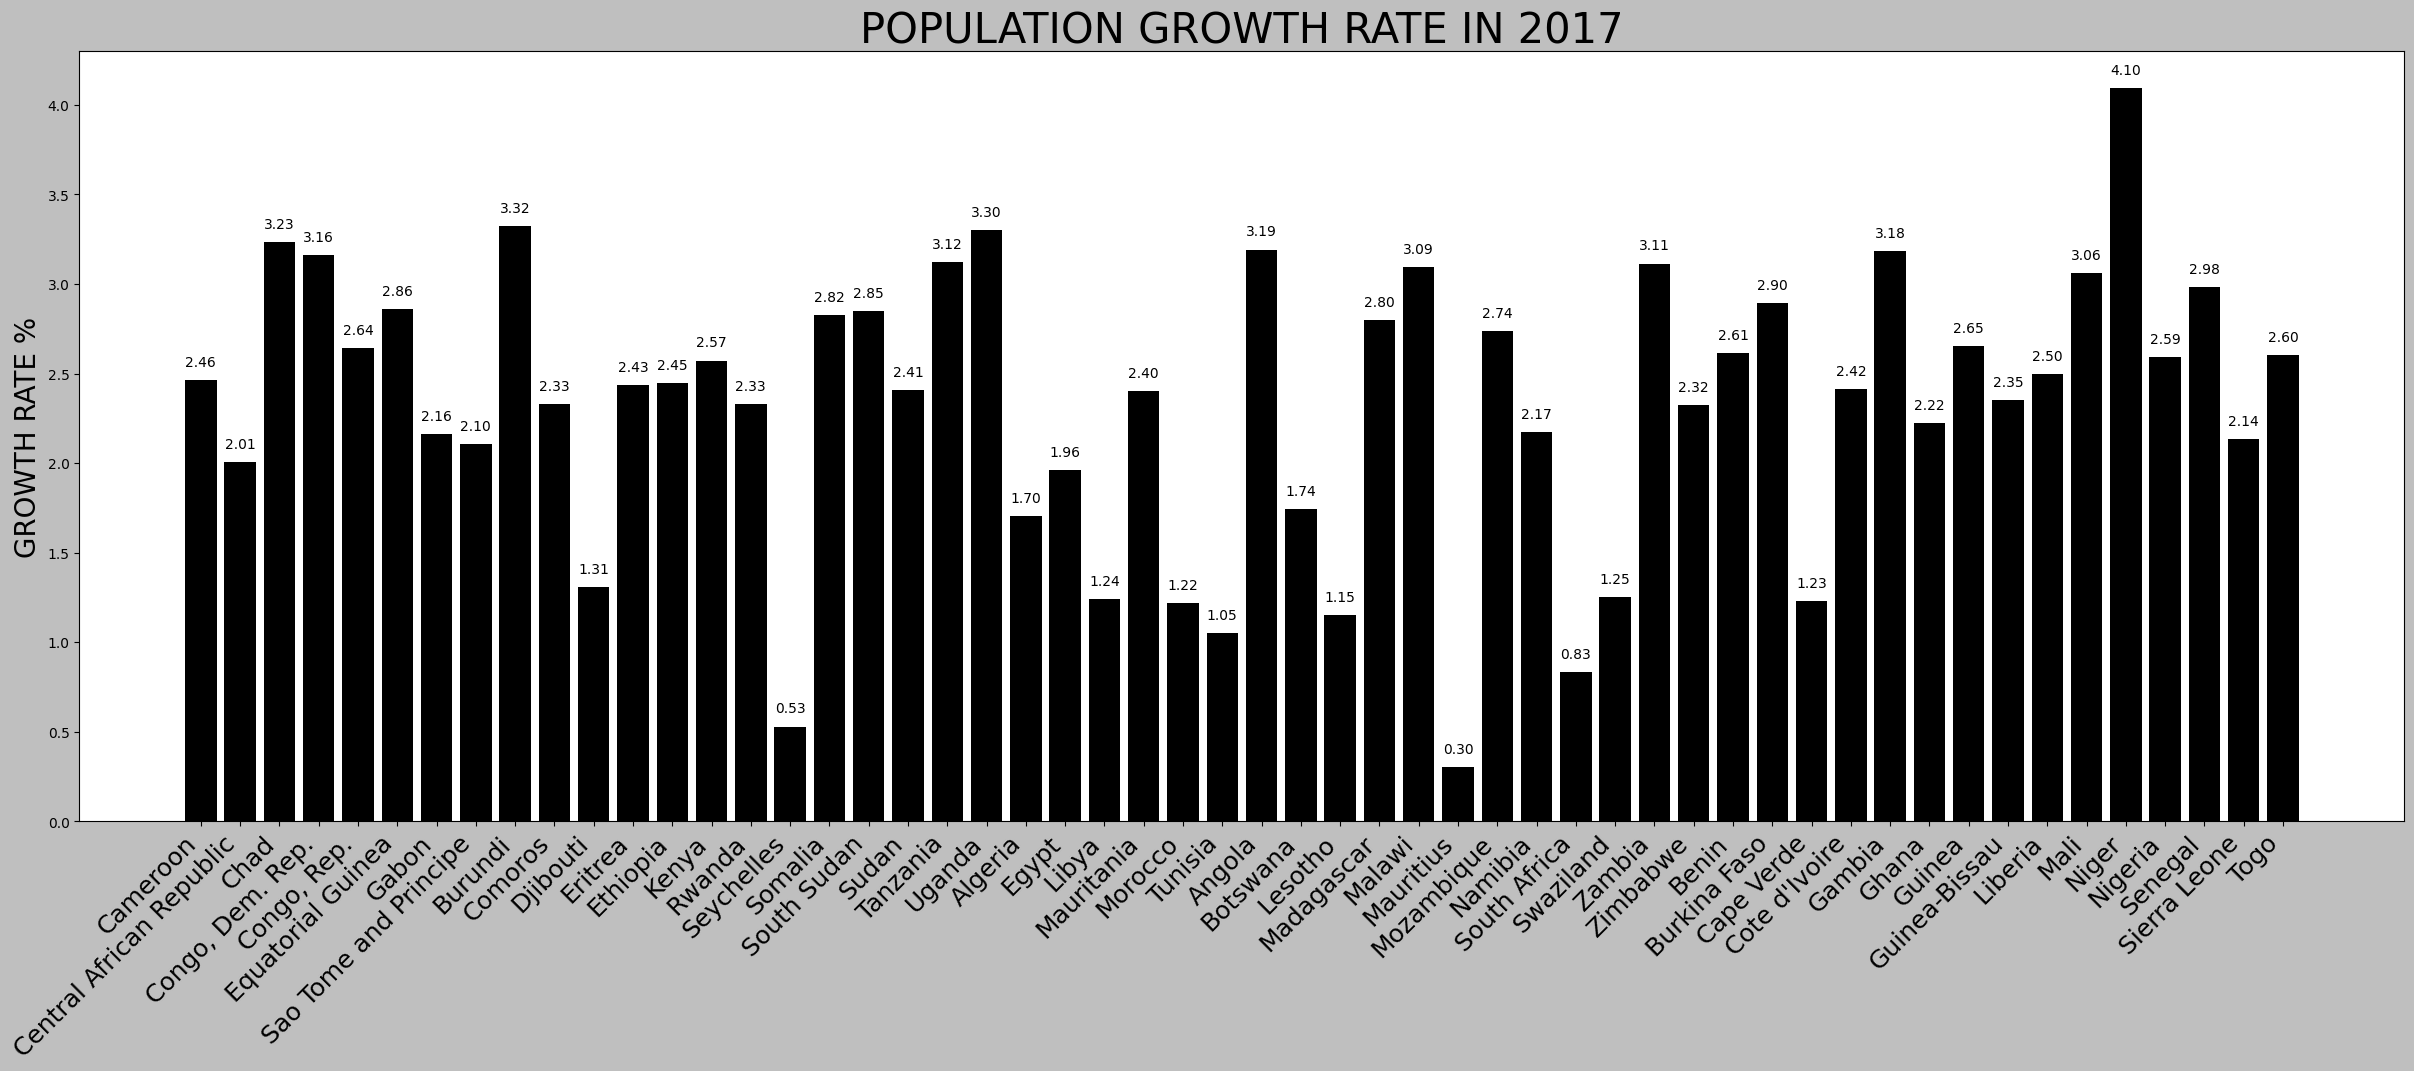

From the Bar Chart above:
The Standard Deviation is 0.782609473864412
The Range is 3.7903261575042735
The Interquartile Range is 0.8262315110422325
The Variance is 0.6124775885823317


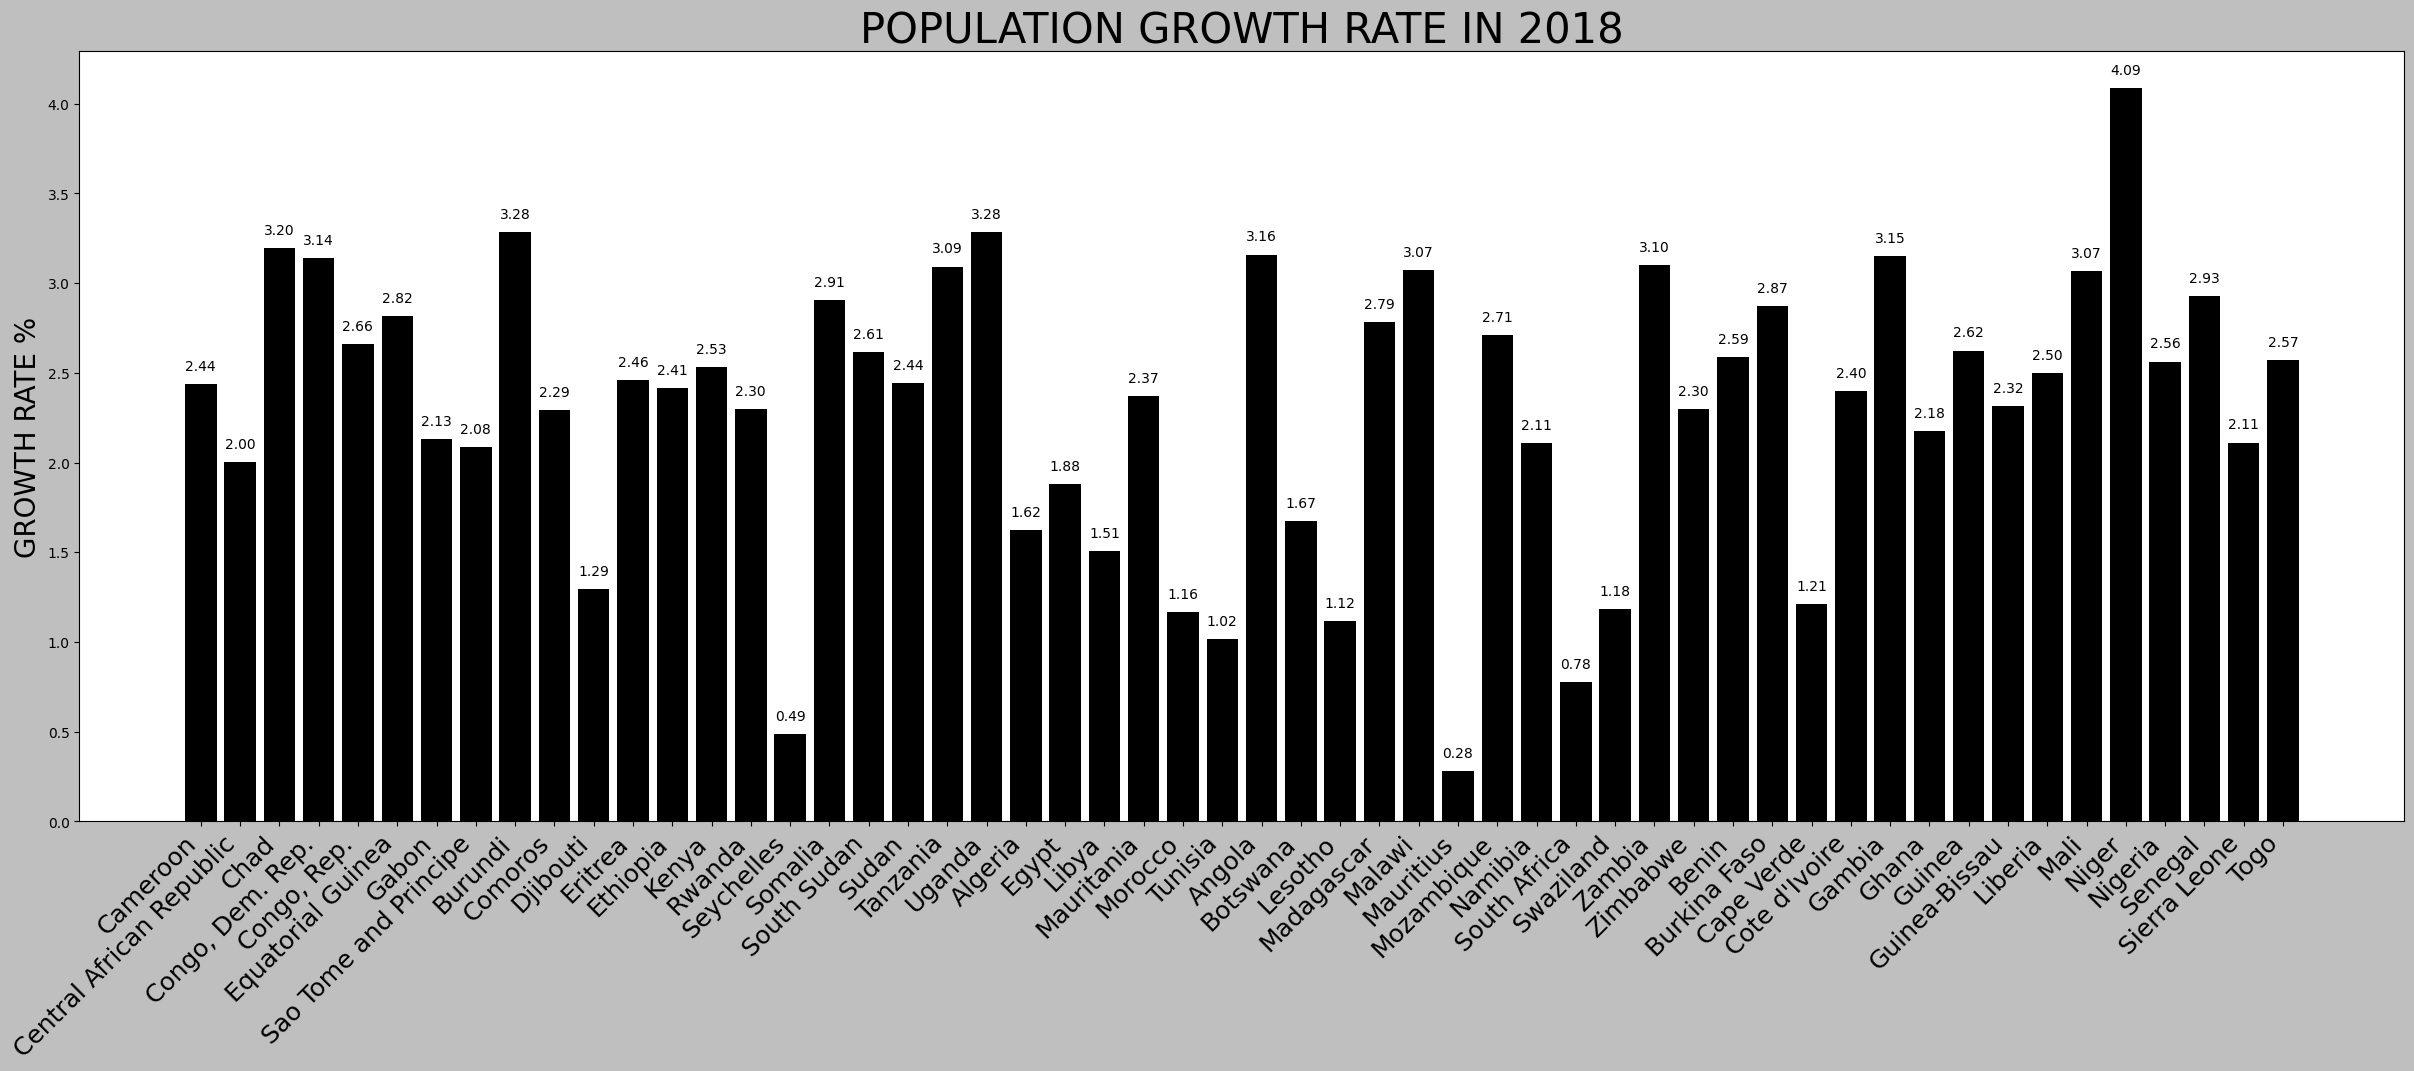

From the Bar Chart above:
The Standard Deviation is 0.7826070114573591
The Range is 3.8098362373362353
The Interquartile Range is 0.8368133202801493
The Variance is 0.6124737343822191


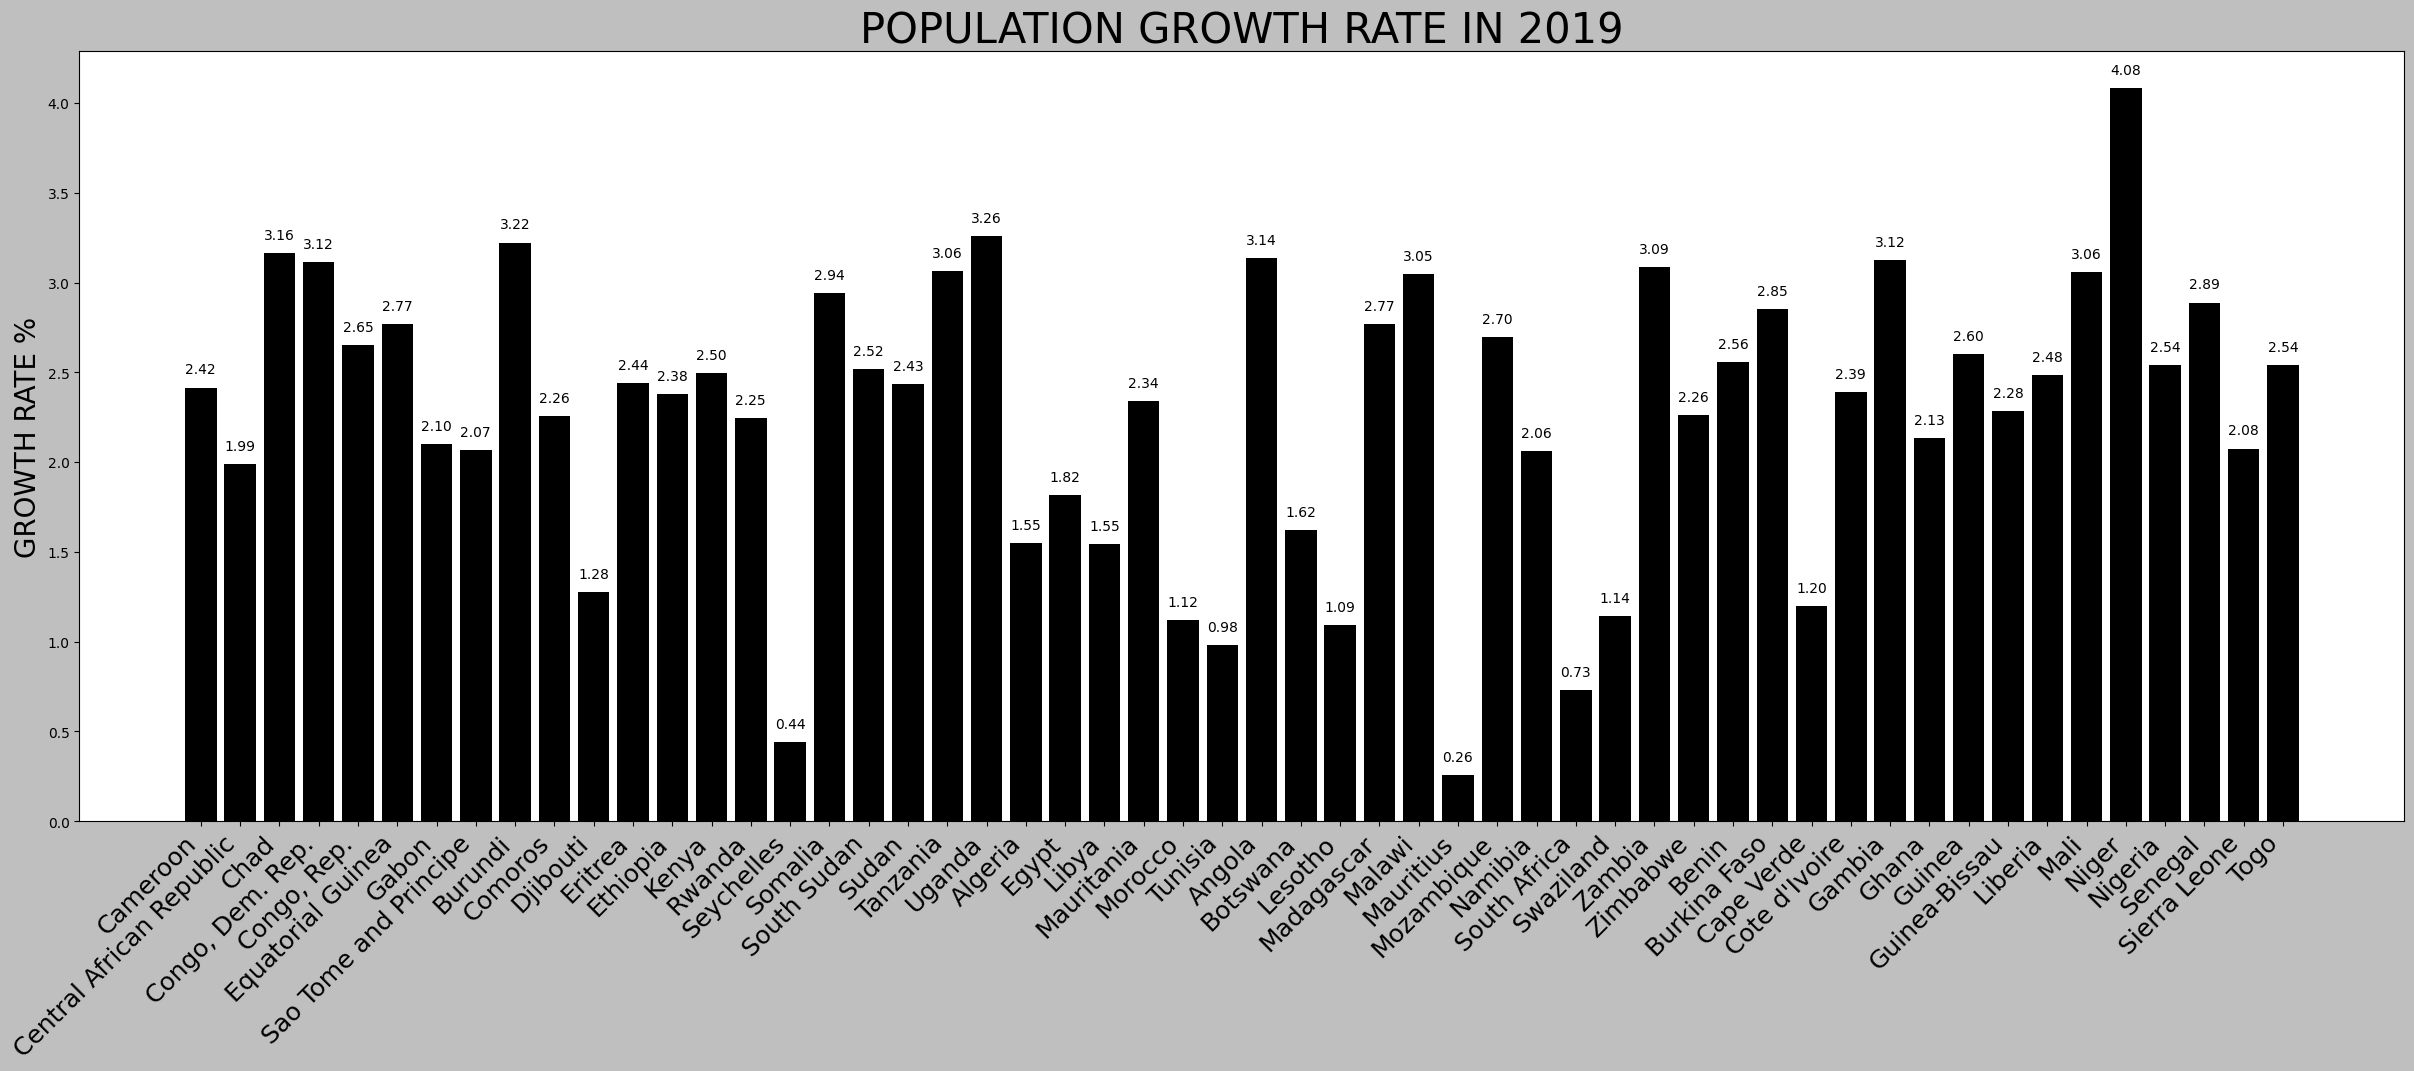

From the Bar Chart above:
The Standard Deviation is 0.7859374957306481
The Range is 3.8255268854128364
The Interquartile Range is 0.8235713725380394
The Variance is 0.6176977471953625


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as sta

#Importing the CSV File into a DataFrame
df = pd.read_csv("myfile.csv")

#Loop through all the Years to plot Bar Charts
for i in range (2011, 2020, 1):
    
    #Selecting The Years (Current and Previous Year) to calculate Growth Rate Percentage
    df_2010 = df[['Country', f"{i-1}"]]
    df_2011 = df[['Country', f"{i}"]]
    
    #Merging both Columns (Years) into a dataframe
    df_merge = df_2010.merge(df_2011, left_on='Country', right_on='Country') 
    #Calculating Annual Growth Rate (In Percentage) 
    df_merge['Annual Population Growth Rate %'] = ((df_merge[f"{i}"]-df_merge[f"{i-1}"])/df_merge[f"{i-1}"]) * 100 
    
    #X Axis and Y Axis
    x = df_merge.Country
    y = df_merge['Annual Population Growth Rate %']
    
    #To Calculate Standard Deviation
    Standard_d = y.std()
    
    #To Calculate Range
    Max_Val = y.max()
    Min_Val = y.min()
    
    #To Calculate Interquartile Range
    #Ascending Order 
    new_df_merge = df_merge.sort_values('Annual Population Growth Rate %', ascending=True)
    #Arranging the index of the new DataFrame. Basically Assigning an index to an already indexed file 
    new_df_merge = new_df_merge.reset_index() 
    #Removing the scattered index in the file. Hence, only the newly reset properly arranged index remains
    new_df_merge = new_df_merge.drop(['index'], axis=1) 
    #Using Numpy for Interquartile Range
    q3, q1 = np.percentile(new_df_merge['Annual Population Growth Rate %'], [75, 25])
    iqr = q3 - q1
    
    #To Calculate Variance
    Variance_output = sta.variance(df_merge['Annual Population Growth Rate %'])
    
    #Plotting The Bar Charts 
    plt.figure(figsize=(30,10))
    plt.bar(x, y, color='k')
    plt.title(f'POPULATION GROWTH RATE IN {i}', fontdict={'fontsize':30, 'fontname':'Code Next Bold'})

    plt.ylabel('GROWTH RATE %', fontdict={'fontsize':20})
    plt.xticks(rotation=45, fontsize='18', horizontalalignment='right')
    
    #Styling the Bar Chart
    plt.rcParams.update(plt.rcParamsDefault)
    plt.style.use("grayscale")
    
    #Attaching labels of the actual value to each Column in the Bar Chart
    for x,y in zip(x, y):
        label='{:.2f}'.format(y)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 10), ha='center')
    plt.show()
    
    #Additional Information to each Bar Chart
    print(f'From the Bar Chart above:')
    print(f'The Standard Deviation is {Standard_d}')
    print(f'The Range is {Max_Val - Min_Val}')
    print(f'The Interquartile Range is {iqr}')
    print(f'The Variance is {Variance_output}')
    
print ('')